# Handling Outliers

An outlier is a value that deviates substantially from the rest of the data. That means it is an observation that is abnormally far apart from the other values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize":(4, 5)}) #width=4, height=5

## Automobile Dataset

In [3]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", 
           "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
           "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", 
           "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Boxplots and Interquartile Range (IQR)

Graphing features are good ways for detecting outliers. Box plots are good examples. 

In [5]:
# Getting a few variables
df2 = df[['horsepower','city_mpg','highway_mpg']]
df2.head()

,horsepower,city_mpg,highway_mpg
0,111.0,21,27
1,111.0,21,27
2,154.0,19,26
3,102.0,24,30
4,115.0,18,22


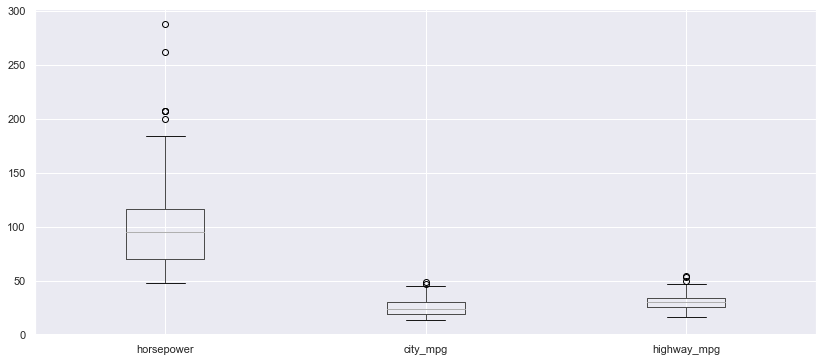

In [6]:
# Using matplotlib to plot the data and visualize the outliers
df2.boxplot(figsize=(14,6));

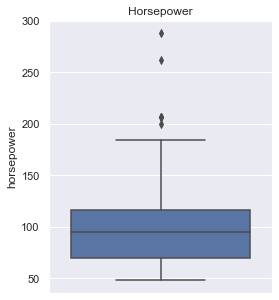

In [7]:
# Using seaborn to plot variable horsepower and visualize the outliers
sns.boxplot(y=df2.horsepower).set_title('Horsepower');	

`whis`: Proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

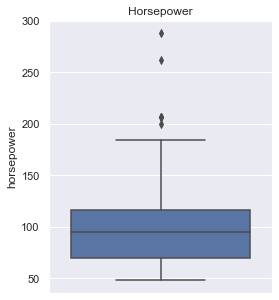

In [8]:
# whis=1.5 produces the same result. It is the default value.
sns.boxplot(y=df2.horsepower, whis=1.5).set_title('Horsepower');

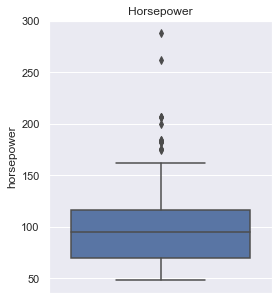

In [9]:
# with whis=1 you get more outliers
sns.boxplot(y=df2.horsepower, whis=1).set_title('Horsepower');

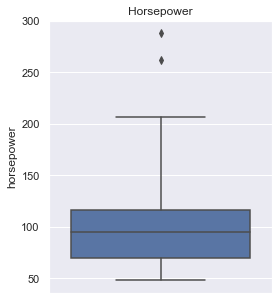

In [10]:
# with whis=2 you get less outliers
sns.boxplot(y=df2.horsepower, whis=2).set_title('Horsepower');

With `whis=0` you get no whisker, only the box. All data outside the box are considered outliers.


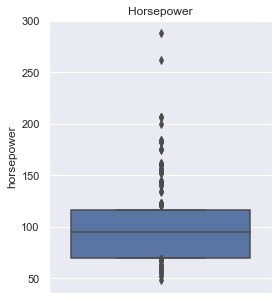

In [11]:
# with whis=2 you get less outliers
sns.boxplot(y=df2.horsepower, whis=0).set_title('Horsepower');

Let's create a function that returns the outliers.

In [12]:
def boxplot_outliers(data, whis=1.5):
    '''
    Show the Boxplot and return the outliers
    '''
    sns.boxplot(y=data, whis=whis)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1-whis*IQR) | (data > Q3+whis*IQR)]
    return outliers

49     262.0
105    200.0
126    207.0
127    207.0
128    207.0
129    288.0
Name: horsepower, dtype: float64

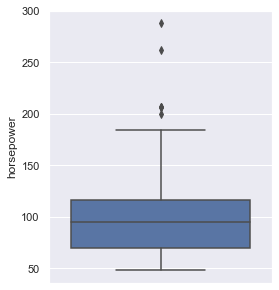

In [13]:
boxplot_outliers(df2.horsepower)

15     182.0
16     182.0
17     182.0
47     176.0
48     176.0
49     262.0
73     184.0
74     184.0
75     175.0
105    200.0
126    207.0
127    207.0
128    207.0
129    288.0
Name: horsepower, dtype: float64

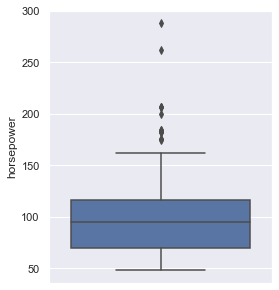

In [14]:
boxplot_outliers(df2.horsepower, 1)

49     262.0
129    288.0
Name: horsepower, dtype: float64

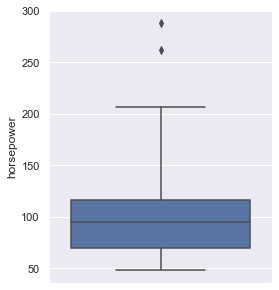

In [15]:
boxplot_outliers(df2.horsepower, 2)

### Analyzing outliers of `city_mpg`

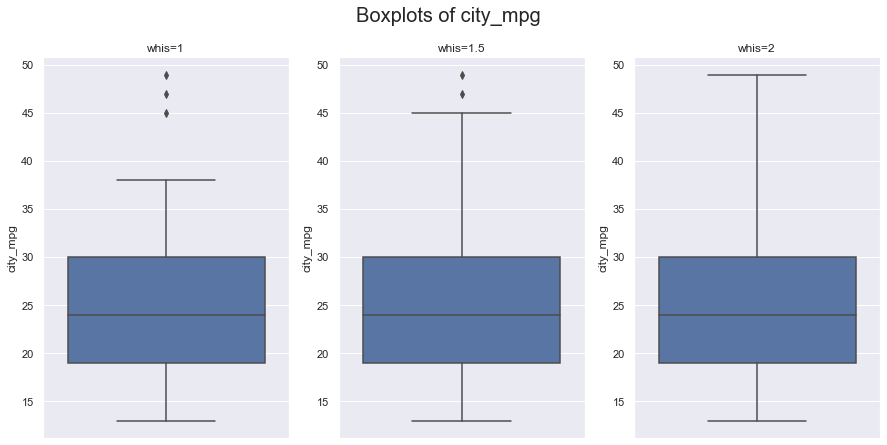

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
city_outl_1 = boxplot_outliers(df2.city_mpg, 1)
ax1.set_title('whis=1')

plt.subplot(1,3,2)
city_outl_2 = boxplot_outliers(df2.city_mpg, 1.5)
ax2.set_title('whis=1.5')

plt.subplot(1,3,3)
city_outl_3 = boxplot_outliers(df2.city_mpg, 2)
ax3.set_title('whis=2')

fig.suptitle('Boxplots of city_mpg', fontsize=20);

In [17]:
print('Number of outliers of city_mpg with whis=1   :', len(city_outl_1))
print('Number of outliers of city_mpg with whis=1.5 :', len(city_outl_2))
print('Number of outliers of city_mpg with whis=2   :', len(city_outl_3))

Number of outliers of city_mpg with whis=1   : 3
Number of outliers of city_mpg with whis=1.5 : 2
Number of outliers of city_mpg with whis=2   : 0


### Analyzing outliers of `highway_mpg`

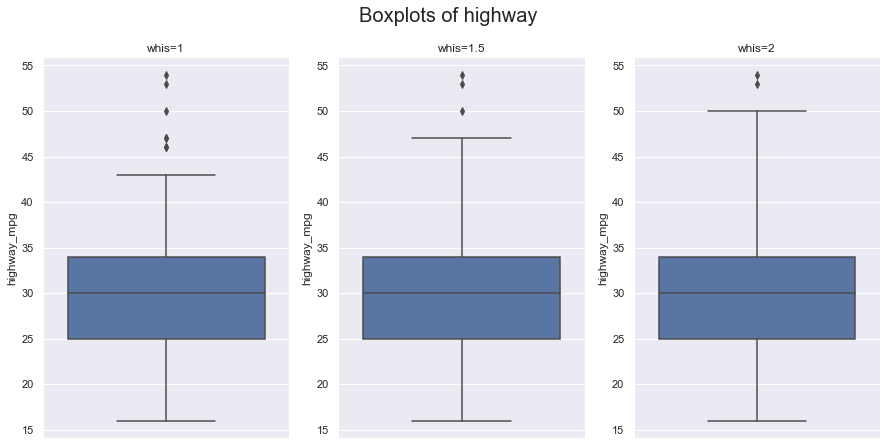

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
high_outl_1 = boxplot_outliers(df2.highway_mpg, 1)
ax1.set_title('whis=1')

plt.subplot(1,3,2)
high_outl_2 = boxplot_outliers(df2.highway_mpg, 1.5)
ax2.set_title('whis=1.5')

plt.subplot(1,3,3)
high_outl_3 = boxplot_outliers(df2.highway_mpg, 2)
ax3.set_title('whis=2')

fig.suptitle('Boxplots of highway', fontsize=20);

In [19]:
print('Number of outliers of city_mpg with whis=1   :', len(high_outl_1))
print('Number of outliers of city_mpg with whis=1.5 :', len(high_outl_2))
print('Number of outliers of city_mpg with whis=2   :', len(high_outl_3))

Number of outliers of city_mpg with whis=1   : 7
Number of outliers of city_mpg with whis=1.5 : 3
Number of outliers of city_mpg with whis=2   : 2


## Boxenplots 

Boxenplots are advancements of boxplots designed to visualize distributions more accurately. Therefore, we can use them to detect outliers.

The number of boxes, and by extension number of percentiles, to draw. All methods are detailed in Wickham’s paper. Each makes different assumptions about the number of outliers and leverages different statistical properties. 

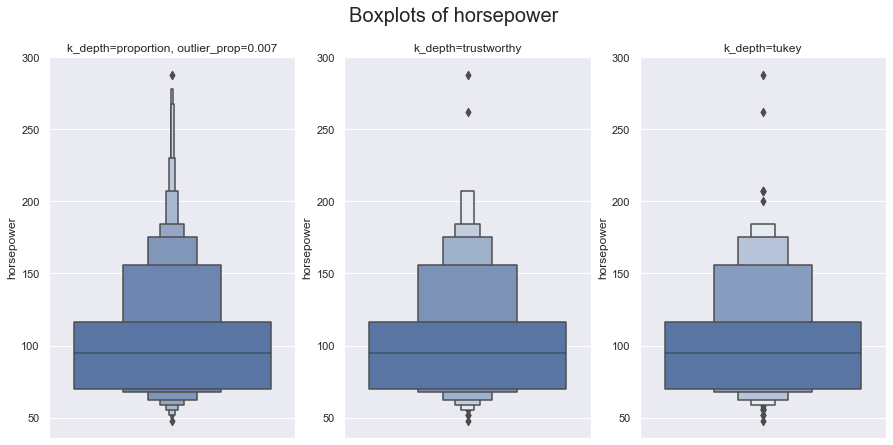

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.horsepower, k_depth='proportion', outlier_prop=0.007)
ax1.set_title('k_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.horsepower, k_depth='trustworthy')
ax2.set_title('k_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.horsepower, k_depth='tukey')
ax3.set_title('k_depth=tukey')

fig.suptitle('Boxplots of horsepower', fontsize=20);

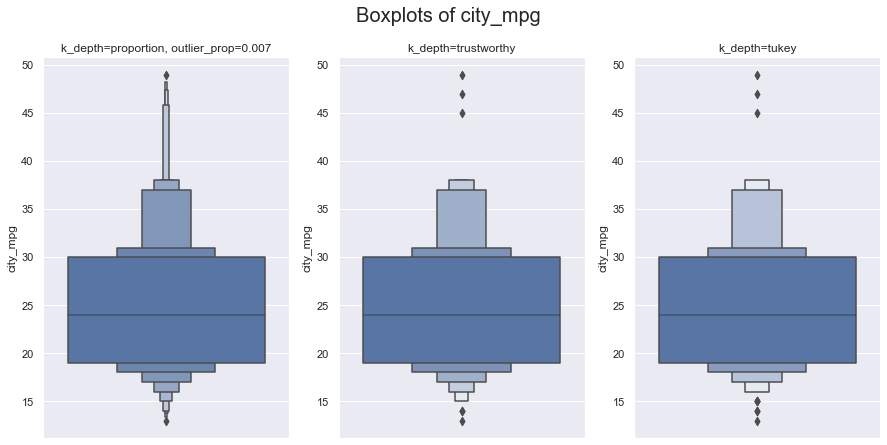

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.city_mpg, k_depth='proportion', outlier_prop=0.007)
ax1.set_title('k_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.city_mpg, k_depth='trustworthy')
ax2.set_title('k_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.city_mpg, k_depth='tukey')
ax3.set_title('k_depth=tukey')

fig.suptitle('Boxplots of city_mpg', fontsize=20);

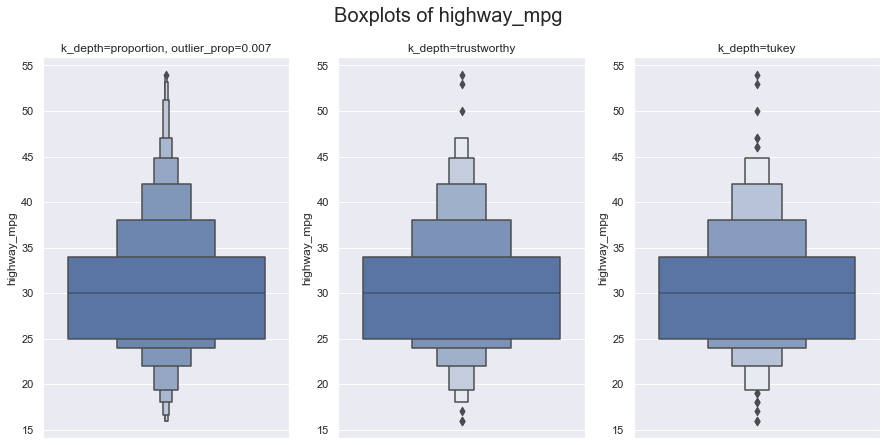

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.highway_mpg, k_depth='proportion', outlier_prop=0.007)
ax1.set_title('k_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.highway_mpg, k_depth='trustworthy')
ax2.set_title('k_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.highway_mpg, k_depth='tukey')
ax3.set_title('k_depth=tukey')

fig.suptitle('Boxplots of highway_mpg', fontsize=20);

## Z-Score

Z-scores or standardized values, are another way to identify outliers. 

In [23]:
def z_score_outliers(x):
    """
    Calculate z-score for each element in x and return the outliers
    """
    mean_x = x.mean()
    std_x = x.std()
    z_scores = (x - mean_x) / std_x
    sns.displot(z_scores, kde=True, height=3, aspect=1.5)
    plt.axvline(x=-3, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    plt.axvline(x=3,  ymin=0, ymax=0.5, color='orangered', linewidth=2)
    z_outliers = z_scores[(z_scores < -3) | (z_scores > 3)]
    x_outliers = z_outliers * std_x + mean_x
    return x_outliers

49     262.0
129    288.0
Name: horsepower, dtype: float64

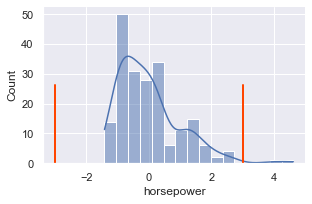

In [24]:
z_score_outliers(df2.horsepower)

18    47.0
30    49.0
90    45.0
Name: city_mpg, dtype: float64

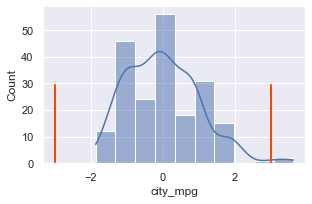

In [25]:
z_score_outliers(df2.city_mpg)

18    53.0
30    54.0
Name: highway_mpg, dtype: float64

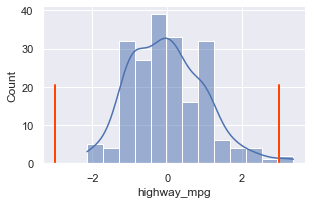

In [26]:
z_score_outliers(df2.highway_mpg)

## Scatter Plots

Scatter plots are graphs that can detect outliers in multivariate settings. 

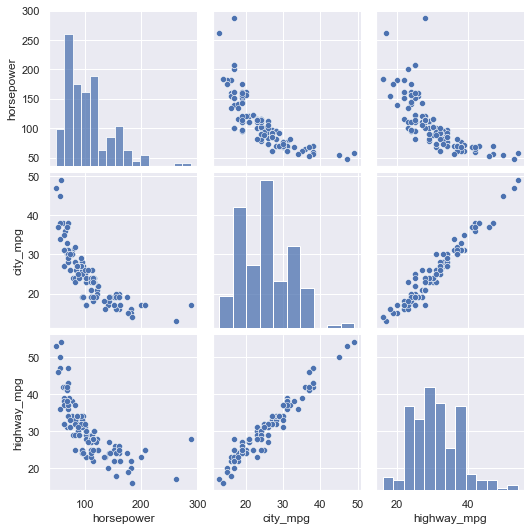

In [27]:
sns.pairplot(data=df2);

Detect outliers in scatterplots is not as easy as in a univariate method like boxplot or z-score. 

Let's focus on horsepower vs. city_mpg

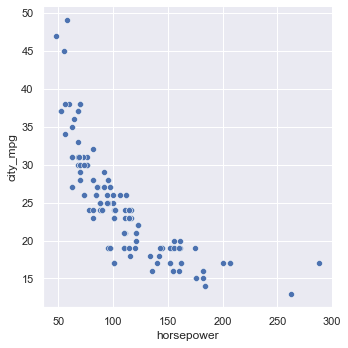

In [28]:
sns.relplot(x=df2.horsepower, y=df2.city_mpg);

It looks like the points in the right lower corner are outliers. Let's remove them.

In [29]:
# removing values with horsepower > 250
df3 = df2[df2.horsepower < 250]

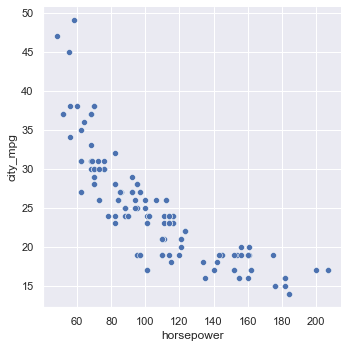

In [30]:
# After removing possible outliers
sns.relplot(x=df3.horsepower, y=df3.city_mpg);

Let's compare the scatterplots before and after removing outliers.

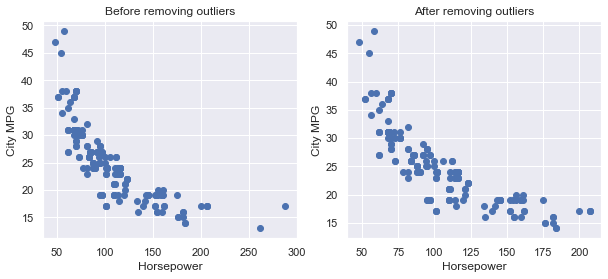

In [31]:
# hosepower vs city_mpg
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(x=df2.horsepower, y=df2.city_mpg)
plt.title('Before removing outliers')
plt.xlabel('Horsepower')
plt.ylabel('City MPG')

plt.subplot(122)
plt.scatter(x=df3.horsepower, y=df3.city_mpg)
plt.title('After removing outliers')
plt.xlabel('Horsepower')
plt.ylabel('City MPG');

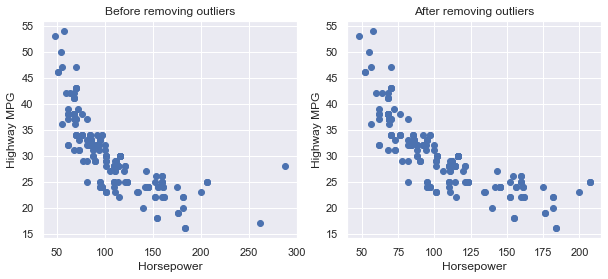

In [32]:
# hosepower vs highway_mpg
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(x=df2.horsepower, y=df2.highway_mpg)
plt.title('Before removing outliers')
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG')

plt.subplot(122)
plt.scatter(x=df3.horsepower, y=df3.highway_mpg)
plt.title('After removing outliers')
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG');

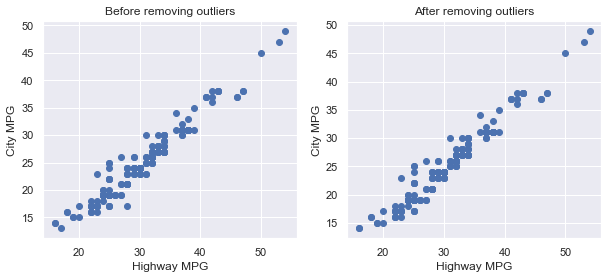

In [33]:
# highway_mpg vs city_mpg
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(x=df2.highway_mpg, y=df2.city_mpg)
plt.title('Before removing outliers')
plt.xlabel('Highway MPG')
plt.ylabel('City MPG')

plt.subplot(122)
plt.scatter(x=df3.highway_mpg, y=df3.city_mpg)
plt.title('After removing outliers')
plt.xlabel('Highway MPG')
plt.ylabel('City MPG');

Notice that in these two last graphs there is no difference between before and after.

Reference:
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 3